In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

In [3]:
# Generar datos sintéticos: una señal sinusoidal con ruido
def generate_sinusoidal_data(num_samples=1000, noise_factor=0.1):
    np.random.seed(42)
    X = np.linspace(0, 50, num_samples)
    y = np.sin(X) + noise_factor * np.random.randn(num_samples)
    return X, y

# Generar los datos
num_samples = 1000
X, y = generate_sinusoidal_data(num_samples=num_samples)

# Preparar los datos para la 1D CNN
sequence_length = 20  # Longitud de la secuencia utilizada para predecir el siguiente valor
X_data = []
y_data = []

for i in range(num_samples - sequence_length):
    X_data.append(y[i:i + sequence_length])
    y_data.append(y[i + sequence_length])

X_data = np.array(X_data)
y_data = np.array(y_data)

# Dividir en conjuntos de entrenamiento y prueba
split_idx = int(0.8 * len(X_data))
X_train, X_test = X_data[:split_idx], X_data[split_idx:]
y_train, y_test = y_data[:split_idx], y_data[split_idx:]

# Redimensionar para la entrada a la 1D CNN (agregar una dimensión)
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]


In [4]:

# Definir el modelo de la red neuronal convolucional de 1D para regresión
model = Sequential([
    Conv1D(32, 3, activation='relu', input_shape=(sequence_length, 1)),  # Capa convolucional 1D con 32 filtros
    MaxPooling1D(2),  # Capa de MaxPooling 1D
    Conv1D(64, 3, activation='relu'),  # Segunda capa convolucional 1D con 64 filtros
    MaxPooling1D(2),  # Segunda capa de MaxPooling 1D
    Flatten(),  # Aplanar la salida para la capa completamente conectada
    Dense(64, activation='relu'),  # Capa totalmente conectada con 64 neuronas
    Dropout(0.5),  # Dropout para reducir el sobreajuste
    Dense(1)  # Capa de salida con una sola neurona para la regresión (valor continuo)
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='mean_squared_error')  # Pérdida MSE para problemas de regresión

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/20
25/25 [==============================] - 1s 14ms/step - loss: 0.1992 - val_loss: 0.0856
Epoch 2/20
25/25 [==============================] - 0s 4ms/step - loss: 0.0862 - val_loss: 0.0280
Epoch 3/20
25/25 [==============================] - 0s 4ms/step - loss: 0.0527 - val_loss: 0.0201
Epoch 4/20
25/25 [==============================] - 0s 4ms/step - loss: 0.0461 - val_loss: 0.0190
Epoch 5/20
25/25 [==============================] - 0s 4ms/step - loss: 0.0421 - val_loss: 0.0149
Epoch 6/20
25/25 [==============================] - 0s 5ms/step - loss: 0.0429 - val_loss: 0.0156
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.0432 - val_loss: 0.0221
Epoch 8/20
25/25 [==============================] - 0s 5ms/step - loss: 0.0411 - val_loss: 0.0178
Epoch 9/20
25/25 [==============================] - 0s 4ms/step - loss: 0.0389 - val_loss: 0.0141
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0159
Epoch 11/20
25/25 

Pérdida en el conjunto de prueba (MSE): 0.01
7/7 [==============================] - 0s 1ms/step


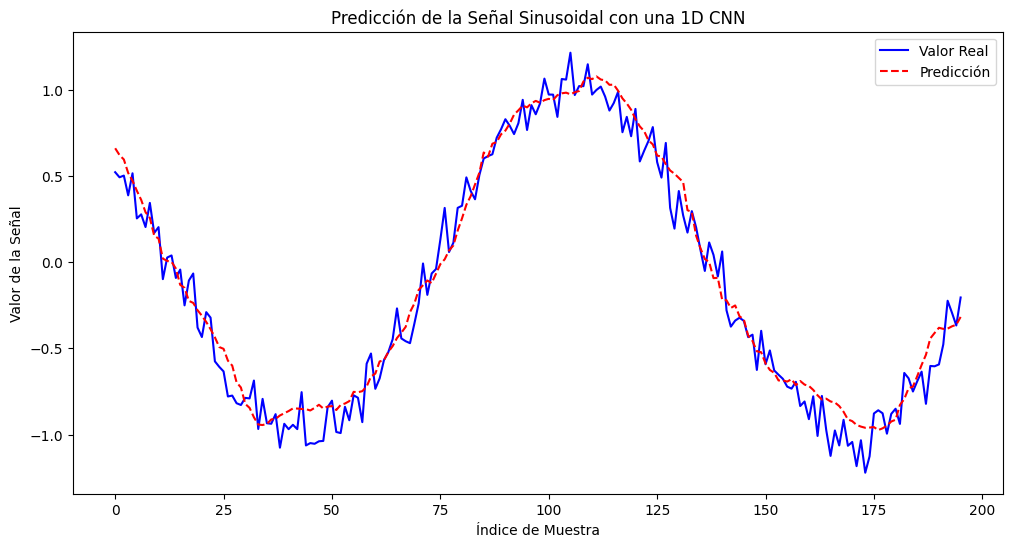

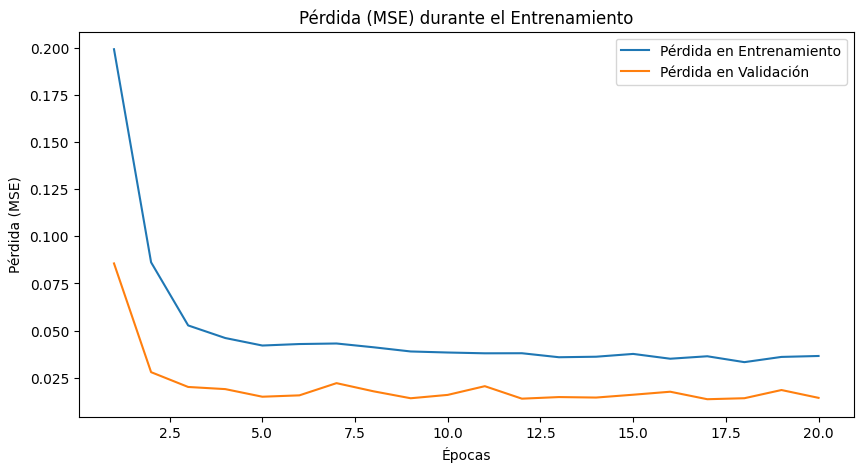

In [5]:
# Evaluar el modelo en el conjunto de prueba
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Pérdida en el conjunto de prueba (MSE): {test_loss:.2f}")

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Graficar los valores reales vs los valores predichos
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label='Valor Real', color='blue')
plt.plot(range(len(y_pred)), y_pred, label='Predicción', color='red', linestyle='--')
plt.title('Predicción de la Señal Sinusoidal con una 1D CNN')
plt.xlabel('Índice de Muestra')
plt.ylabel('Valor de la Señal')
plt.legend()
plt.show()

# Graficar la pérdida durante el entrenamiento
epochs = range(1, len(history.history['loss']) + 1)
plt.figure(figsize=(10, 5))
plt.plot(epochs, history.history['loss'], label='Pérdida en Entrenamiento')
plt.plot(epochs, history.history['val_loss'], label='Pérdida en Validación')
plt.title('Pérdida (MSE) durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (MSE)')
plt.legend()
plt.show()